In [204]:
from typing import List, Tuple
import torch
import matplotlib.pyplot as plt

In [295]:
import importlib
import main
importlib.reload(main)

<module 'main' from '/Users/ytakano/projects/dass2023/adv/main.py'>

In [301]:
%%time
x_true, x_free, x_filter, x_smoother = main.run()

CPU times: user 1.67 s, sys: 777 ms, total: 2.45 s
Wall time: 1.08 s


## フリーラン vs 真値
- 誤差(シェード)が下流側に移流している

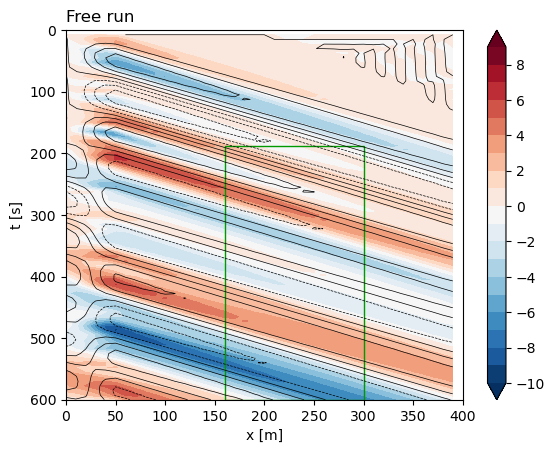

In [302]:
main.plot_xt(
    x_free - x_true, 
    torch.arange(-10, 10, 1), 
    x_free, 
    torch.arange(-20, 20, 5),
    "Free run",
)

## EnKF vs 真値
- メンバ数100
- 同化領域(緑枠)の下流側で誤差が減少している
- 観測誤差はσ=8で、下流側の誤差の大きさはそれより小さい（4程度）

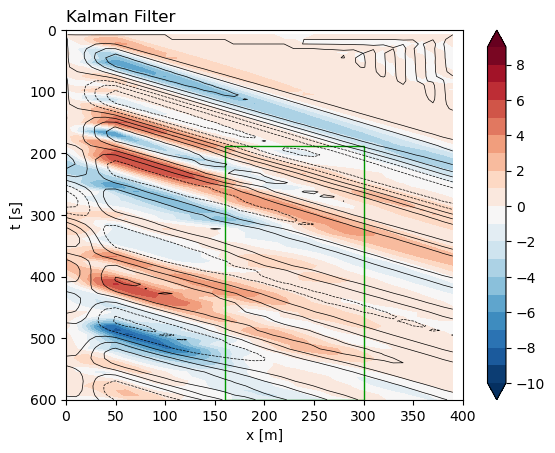

In [303]:
main.plot_xt(
    x_filter - x_true, 
    torch.arange(-10, 10, 1),
    x_filter,
    torch.arange(-20, 20, 5),
    "Kalman Filter"
)

## 固定ラグ平滑化 vs 真値
- メンバ数100、ラグ300ステップ(150秒)
- EnKFと比べて上流側の誤差も減少している

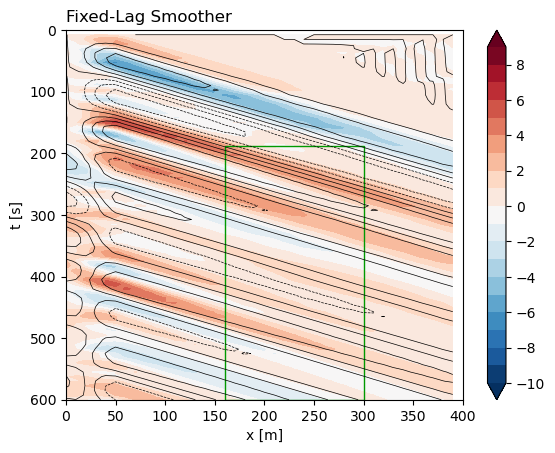

In [304]:
main.plot_xt(
    x_smoother - x_true, 
    torch.arange(-10, 10, 1),
    x_smoother,
    torch.arange(-20, 20, 5),
    "Fixed-Lag Smoother",
)